<a href="https://colab.research.google.com/github/BrunoAlexandreAmaral/modelo_de_Regress-o_para_marketing/blob/main/modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e Carregando o arquivo
nessa etapa iniciamos com o carregamento do arquivo e transformando ele em Data Frame

In [ ]:
import pandas as pd
from google.colab import files
upload = files.upload()

In [ ]:
df = pd.read_csv("MKT.csv", sep=",")

In [ ]:
df = pd.DataFrame(df)

# Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Análise Descritiva

Essa etapa Identificamos que temos 4 variaveis sendo elas youtube,facebook,newspaper e sales para analisar e identificar se existe uma possivel Regressão Linear negativa ou positivo entre o inventimento e o valor de Venda.

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
## Criando uma feature para ver o total de investimento
df["Investimento_total"] = df["youtube"] + df["facebook"] + df["newspaper"]

In [ ]:
display(df)

,youtube,facebook,newspaper,sales,Investimento_total
0,84.72,19.20,48.96,12.60,152.88
1,351.48,33.96,51.84,25.68,437.28
2,135.48,20.88,46.32,14.28,202.68
3,116.64,1.80,36.00,11.52,154.44
4,318.72,24.00,0.36,20.88,343.08
...,...,...,...,...,...
166,45.84,4.44,16.56,9.12,66.84
167,113.04,5.88,9.72,11.64,128.64
168,212.40,11.16,7.68,15.36,231.24
169,340.32,50.40,79.44,30.60,470.16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   youtube             171 non-null    float64
 1   facebook            171 non-null    float64
 2   newspaper           171 non-null    float64
 3   sales               171 non-null    float64
 4   Investimento_total  171 non-null    float64
dtypes: float64(5)
memory usage: 6.8 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales,Investimento_total
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632
std,102.449597,17.913532,24.902918,6.314608,112.167551
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.080000,11.700000,13.740000,12.540000,146.820000
50%,179.760000,26.760000,31.080000,15.480000,248.400000
75%,262.980000,43.680000,50.880000,20.820000,337.740000
max,355.680000,59.520000,121.080000,32.400000,520.320000


# Analise Exploratoria

Nessa etapa elaboramos alguns graficos para entender melhor os dados e se existe uma certa Correlação entre os valores de investimento com o valor da Venda

In [ ]:
fig_Um = px.box(df,x=["facebook","newspaper","youtube","Investimento_total","sales"], title="VALOR INVESTIDO EM PUBLICIDADE:")
fig_Um.show()

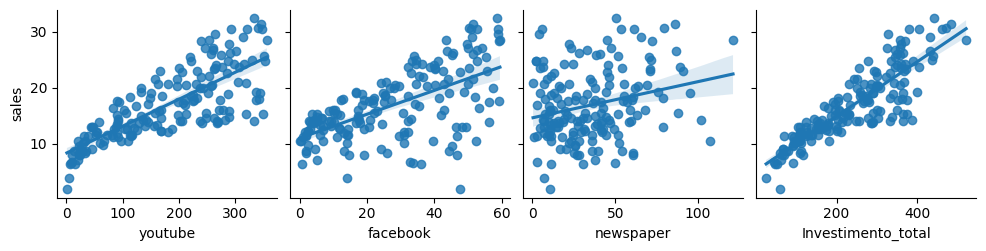

In [ ]:
fig_Dois =sns.pairplot(df,x_vars=["youtube","facebook","newspaper","Investimento_total"],y_vars="sales", kind="reg")

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales,Investimento_total
youtube,1.000000,0.086538,0.110759,0.782030,0.951773
facebook,0.086538,1.000000,0.293425,0.602918,0.303889
newspaper,0.110759,0.293425,1.000000,0.254987,0.370040
sales,0.782030,0.602918,0.254987,1.000000,0.867176
Investimento_total,0.951773,0.303889,0.370040,0.867176,1.000000


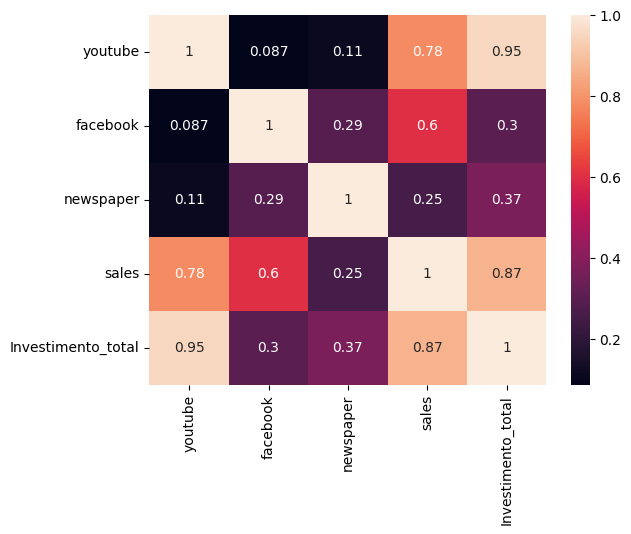

In [ ]:
fig_Tres= sns.heatmap(df.corr(), annot=True)

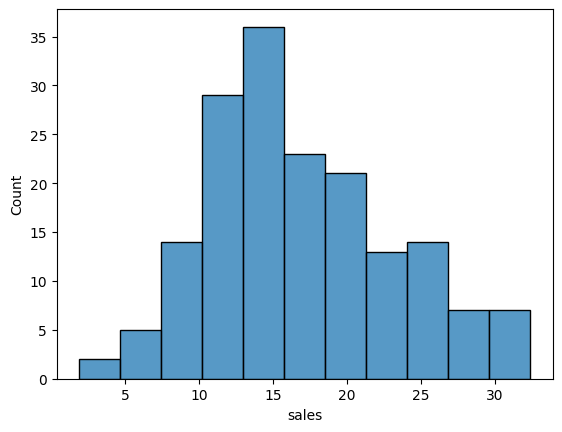

In [ ]:
sns.histplot(df["sales"]);

In [ ]:
import matplotlib.pyplot as plt

# Etapa da Modelagem

Nessa Etapa criamos o modelo de regresaão, separamos o nosso Modelo train/test

o modelo que ultilizamos foi o Linear Regression da sklearn

In [ ]:
X = pd.DataFrame(df, columns = ["youtube","facebook","newspaper"])
y= pd.DataFrame(df, columns=["sales"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=46)

In [ ]:
print(X.shape)
print(y.shape)

(171, 3)
(171, 1)


In [ ]:
Model_Linear = LinearRegression()

# Etapa de Predição e Calculo da predição

In [ ]:
Model_Linear_Treinado = Model_Linear.fit(X_train,y_train)

In [ ]:
print("Ponto onde a linha começa no grafico :",Model_Linear.intercept_)
print("aqui esta como cada Variiavel afeta a saida precista no modelo",Model_Linear.coef_)

Ponto onde a linha começa no grafico : [3.71945778]
aqui esta como cada Variiavel afeta a saida precista no modelo [[0.04321025 0.19253982 0.00712476]]


In [ ]:
Model_Linear_Predi = Model_Linear_Treinado.predict(X_test)

In [ ]:
#R2
r2 = r2_score(Model_Linear_Predi,y_test)
display(r2)

0.8911485538476992

# RESULTADO FINAL

Com base na análise realizada, podemos afirmar que há uma forte relação entre os investimentos em publicidade (youtube, facebook, newspaper) e as vendas. O modelo de regressão linear ajustado mostrou que aproximadamente **89,11%** da variabilidade nas vendas pode ser explicada pelos investimentos em publicidade. Isso indica que, em média, um aumento nos investimentos está associado a um aumento correspondente nas vendas.
Esses resultados sugerem que, à medida que os investimentos em publicidade aumentam, espera-se que as vendas também aumentem proporcionalmente. A análise de regressão fornece uma compreensão quantitativa da relação entre as variáveis, permitindo prever como mudanças nos investimentos podem impactar as vendas de forma preditiva.




In [ ]:
#formatando avariavel para porcentagem com duas casas decimais
porcentagem = "{:.2%}".format(r2)

In [ ]:
porcentagem

'89.11%'